In [1]:
from qiskit import __version__
 
print(__version__)

2.3.0


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from math import pi
import random

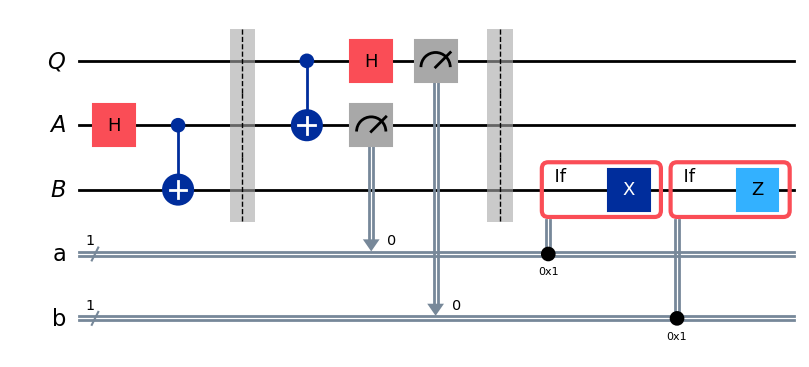

In [3]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

#prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

#alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)

#alice measures and sends classical bitst o bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

#bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw(output="mpl"))

In [4]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)
 
display(array_to_latex(random_gate.to_matrix()))

<IPython.core.display.Latex object>

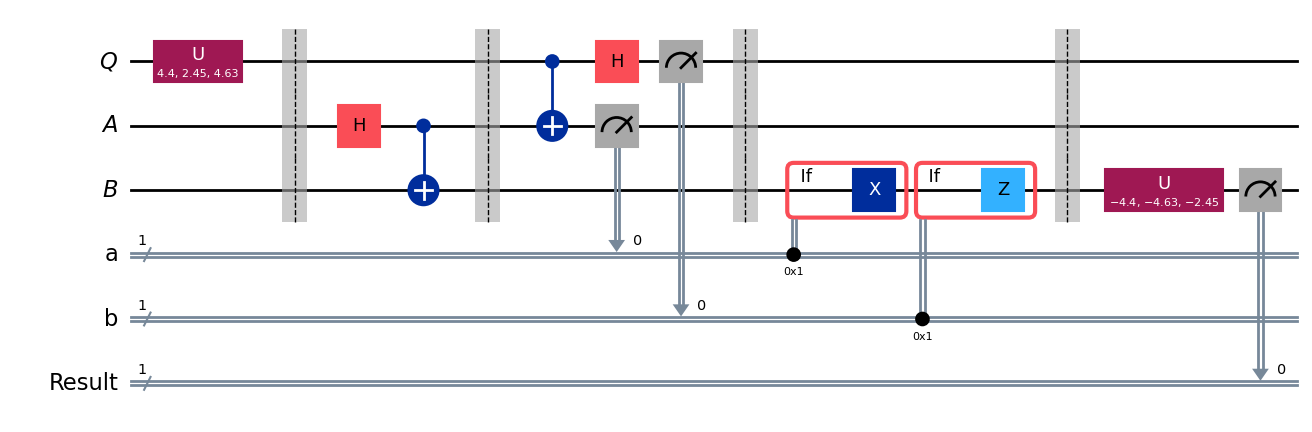

In [5]:
# testing circuit

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# start with randomly selected gate on Q
test.append(random_gate, qubit)
test.barrier()

# append entire teleportation protocol

test = test.compose(protocol)
test.barrier()

# finally, apply the inverse of the random unitray to B and measure
test.append(random_gate.inverse(), ebit1)
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw(output="mpl"))


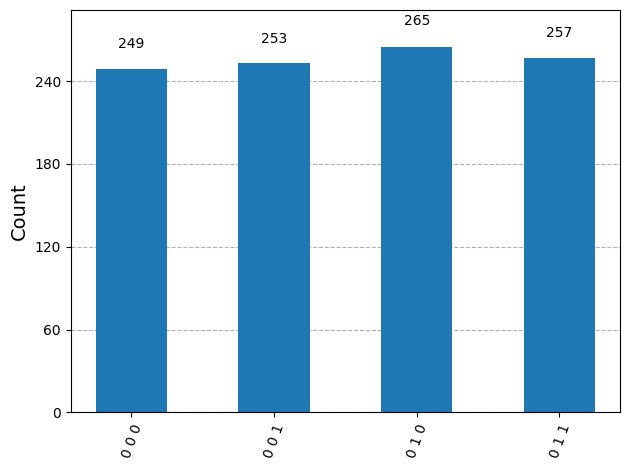

In [6]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

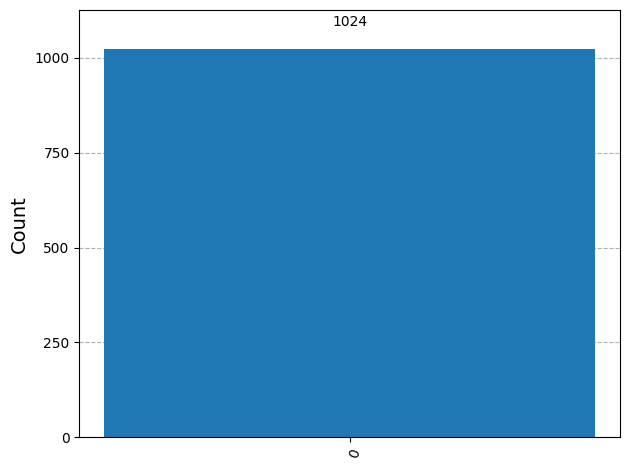

In [7]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))